In [1]:
import math # 자주 사용되니, 미리 불러와주기.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# 1. 데이터 보기.

In [2]:
df=pd.read_csv("./../data/Starwars.csv")
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


* name : 이름
* height : 키
* mass : 몸무게
* hair_color : 머리 색상
* skin_color : 피부 색상
* eye_color : 눈 색깔
* birth_year : 태어난 연도
* sex : (생물학적) 성별
* gender : (사회적) 성별
* homeworld : 국적 
* species : 종

[tip] 범주형 변수와 연속형 변수를 분리해두면 분석하기 수월하다.
* 범주형 변수 : name, hair_color, skin_color, eye_color, sex, gender, homeworld, species
* 연속형 변수 : height, mass, birth_year

In [3]:
df.info() # 범주형인지 연속형인지 파악할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [4]:
df.describe() # 연속형 변수에 대한 수치 계산 보여주기.

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [5]:
df.describe(include="object") # 범주형 변수에 대한 수치 계산 보여주기.

,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Luke Skywalker,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [6]:
print("hair_color : ", df["hair_color"].unique())
print("skin_color : ", df["skin_color"].unique())
print("eye_color : ", df["eye_color"].unique())
print("sex : ", df["sex"].unique())
print("gender : ", df["gender"].unique())
print("homeworld : ", df["homeworld"].unique())
print("species : ", df["species"].unique())
# 범주가 적으면, 범주 별로 그래프를 그리기 쉬워진다.

hair_color :  ['blond' nan 'none' 'brown' 'brown, grey' 'black' 'auburn, white'
 'auburn, grey' 'white' 'grey' 'auburn' 'blonde' 'unknown']
skin_color :  ['fair' 'gold' 'white, blue' 'white' 'light' 'white, red' 'unknown'
 'green' 'green-tan, brown' 'pale' 'metal' 'dark' 'brown mottle' 'brown'
 'grey' 'mottled green' 'orange' 'blue, grey' 'grey, red' 'red' 'blue'
 'grey, green, yellow' 'yellow' 'tan' 'fair, green, yellow' 'grey, blue'
 'silver, red' 'green, grey' 'red, blue, white' 'brown, white' 'none']
eye_color :  ['blue' 'yellow' 'red' 'brown' 'blue-gray' 'black' 'orange' 'hazel' 'pink'
 'unknown' 'red, blue' 'gold' 'green, yellow' 'white' 'dark']
sex :  ['male' 'none' 'female' 'hermaphroditic' nan]
gender :  ['masculine' 'feminine' nan]
homeworld :  ['Tatooine' 'Naboo' 'Alderaan' 'Stewjon' 'Eriadu' 'Kashyyyk' 'Corellia'
 'Rodia' 'Nal Hutta' 'Bestine IV' nan 'Kamino' 'Trandosha' 'Socorro'
 'Bespin' 'Mon Cala' 'Chandrila' 'Endor' 'Sullust' 'Cato Neimoidia'
 'Coruscant' 'Toydaria' 'M

In [7]:
df.isnull().sum().sum()

105

In [8]:
df.shape[0]*df.shape[1]

957

In [9]:
105/957

0.109717868338558

In [10]:
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1]) # 괄호를 잘 이용해주기.

0.109717868338558

In [11]:
print("총 데이터의 개수 : ", df.shape[0]*df.shape[1])
# f-string <문자열 포맷팅>
print(f"총 결측치의 개수 : {df.isnull().sum().sum()} = 전체 데이터의 {(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])*100:.2f}%") # 소수점 아래 두 번째 까지 표기하기.
print("스타워즈에 나오는 주인공의 수 : ", df["name"].nunique()) # 동명이인이 존재하지 않음을 알 수 있다.
print("스타워즈에 나오는 종의 수 : ", df["species"].nunique())

총 데이터의 개수 :  957
총 결측치의 개수 : 105 = 전체 데이터의 10.97%
스타워즈에 나오는 주인공의 수 :  87
스타워즈에 나오는 종의 수 :  37


# 2. 데이터를 보고 질문하기.

## 강사의 질문
* 스타워즈 캐릭터의 성별 비율?
* 성별에 따른 캐릭터 신장의 분포?
* 가장 무거운 캐릭터와 가장 가벼운 캐릭터 
* 스타워즈 캐릭터의 키와 몸무게는 상관 관계를 가질까?

## 나의 질문
* 스타워즈 캐릭터의 피부 색깔과 머리 색깔이 상관 관계를 가질까?
* 스타워즈 캐릭터의 고향의 분포?
* 스타워즈 캐릭터의 종과 눈 색깔은 상관 관계를 가질까?
* gender에 따른 종의 분포?

# 3. 데이터 정비하기.

## 3-1. 결측치 처리하기.

In [12]:
df.isnull().sum() # 몇 개의 np.nan이 들어 있는지 알 수 있다.

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [13]:
df.isnull().any(axis=0) # 하나라도 True이면 True를 반환해준다. (하나라도 np.nan 값이 있으면 True라고 반환해준다.)

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

In [14]:
df_copy=df.copy()
df_copy.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [15]:
print(df.isnull().sum().sum())
print(df_copy.isnull().sum().sum())

105
105


[tip] 고유한 특성은 그대로 내버려두도록 하기. 그리고 몸무게나 키는 그냥 0으로 처리해주기.

In [16]:
df_copy["height"].fillna(0, inplace=True)
df_copy["mass"].fillna(0, inplace=True)

In [17]:
df_copy.isnull().sum()

name           0
height         0
mass           0
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [18]:
print(df_copy.loc[df_copy["sex"]=="none"])
print(df_copy.loc[df_copy["sex"].isnull()]) # sex가 np.nan인 값을 보여주기.

      name  height   mass hair_color   skin_color  eye_color  birth_year  \
1    C-3PO   167.0   75.0        NaN         gold     yellow       112.0   
2    R2-D2    96.0   32.0        NaN  white, blue        red        33.0   
7    R5-D4    97.0   32.0        NaN   white, red        red         NaN   
21   IG-88   200.0  140.0       none        metal        red        15.0   
72  R4-P17    96.0    0.0       none  silver, red  red, blue         NaN   
84     BB8     0.0    0.0       none         none      black         NaN   

     sex     gender homeworld species  
1   none  masculine  Tatooine   Droid  
2   none  masculine     Naboo   Droid  
7   none  masculine  Tatooine   Droid  
21  none  masculine       NaN   Droid  
72  none   feminine       NaN   Droid  
84  none  masculine       NaN   Droid  
              name  height  mass hair_color skin_color eye_color  birth_year  \
36        Ric Oli?   183.0   0.0      brown       fair      blue         NaN   
39   Quarsh Panaka   183.0 

In [19]:
 # sex가 none인 값은 robot으로 넣어주기.
df_copy.loc[df_copy["sex"]=="none", "sex"]="robot"
print("Sex : ", df_copy["sex"].unique())

Sex :  ['male' 'robot' 'female' 'hermaphroditic' nan]


In [20]:
df_copy.isnull().sum()

name           0
height         0
mass           0
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

# 4. EDA & Visualization

## 4-1. 스타워즈 캐릭터의 성별 비율

In [21]:
df_copy["gender"].value_counts() # gender 성비를 알기 위함이다.

masculine    66
feminine     17
Name: gender, dtype: int64

In [22]:
masculine_num=df_copy.loc[df_copy["gender"]=="masculine", "gender"].count()
feminine_num=df_copy.loc[df_copy["gender"]=="feminine", "gender"].count()
robot_num=df_copy.loc[df_copy["gender"]=="robot", "gender"].count()

In [23]:
gender_num=df_copy["gender"].count()

In [24]:
df_copy.loc[df_copy["gender"]=="masculine", "gender"].count()
print(f"masculine은 전체 gender의 {(masculine_num)/(gender_num)*100:.2f}%이다.")
print(f"feminine은 전체 gender의 {(feminine_num)/(gender_num)*100:.2f}%이다.")

masculine은 전체 gender의 79.52%이다.
feminine은 전체 gender의 20.48%이다.


In [25]:
df_copy["sex"].value_counts()

male              60
female            16
robot              6
hermaphroditic     1
Name: sex, dtype: int64

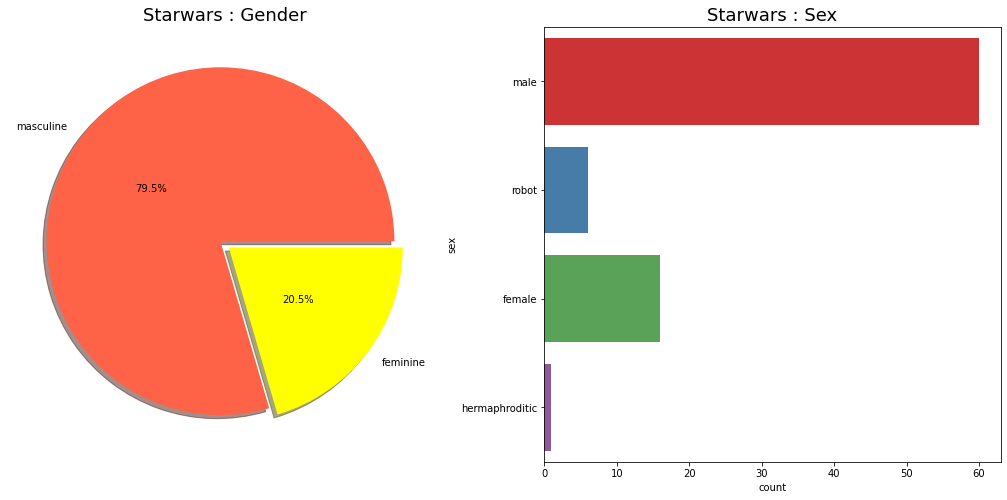

In [26]:
fig, ax=plt.subplots(1, 2, figsize=(18,8))
explode=[0.03, 0.03]
color_list=["tomato", "yellow"]

_=df_copy["gender"].value_counts().plot.pie(ax=ax[0], autopct="%.1f%%", colors=color_list, shadow=True, 
                                            explode=explode, pctdistance=0.5) # % 표기하기 위해서는 2번 적어줘야 한다.
_=ax[0].set_title("Starwars : Gender", size=18)
_=ax[0].set_ylabel("") # ylabel 없애주기.

_=sns.countplot(data=df_copy, y="sex", ax=ax[1], palette="Set1")
_=ax[1].set_title("Starwars : Sex", size=18)

plt.show()
fig.savefig(".././images/gender&sex.png", dpi=200, facecolor='#FDFDFE') # 흰색 배경

## 4-2. 스타워즈 캐릭터의 성별에 따른 신장 분포

In [27]:
df_copy["height"].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [28]:
# 왜도와 첨도 구하기.
print("왜도 : ", df_copy["height"].skew()) # 얼마나 한 쪽으로 치우쳐져 있는지
print("첨도 : ", df_copy["height"].kurt()) # 얼마나 평균 근처에 모여 있는지

왜도 :  -1.7608777087884935
첨도 :  2.927696525163497


In [29]:
df_copy.loc[df_copy["sex"]=="hermaphroditic"] # 자웅동체 캐릭터
# 분포를 그릴 때에는 이 데이터는 제거하고 실행하도록 하기.

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
15,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphroditic,masculine,Nal Hutta,Hutt


In [30]:
df_copy.loc[df_copy["sex"]=="male", "height"]

0     172.0
3     202.0
5     178.0
8     183.0
9     182.0
10    188.0
11    180.0
12    228.0
13    180.0
14    173.0
16    170.0
17    180.0
18     66.0
19    170.0
20    183.0
22    190.0
23    177.0
24    175.0
25    180.0
27      0.0
28     88.0
29    160.0
30    193.0
31    191.0
32    170.0
33    196.0
34    224.0
35    206.0
37    137.0
38    112.0
41    175.0
42    180.0
44     94.0
45    122.0
46    163.0
47    188.0
48    198.0
49    196.0
50    171.0
52    188.0
53    264.0
54    188.0
55    196.0
56    185.0
58    183.0
59    183.0
63    193.0
64    191.0
65    183.0
67    198.0
68    229.0
71     79.0
73    193.0
74    191.0
76    216.0
77    234.0
78    188.0
80    206.0
81      0.0
83      0.0
Name: height, dtype: float64

In [31]:
df_copy["sex"].unique()

array(['male', 'robot', 'female', 'hermaphroditic', nan], dtype=object)

In [32]:
df_copy["gender"].unique()

array(['masculine', 'feminine', nan], dtype=object)

In [33]:
df_copy.loc[df_copy["sex"]=="robot"]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,robot,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,robot,masculine,Naboo,Droid
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,robot,masculine,Tatooine,Droid
21,IG-88,200.0,140.0,none,metal,red,15.0,robot,masculine,NaN,Droid
72,R4-P17,96.0,0.0,none,"silver, red","red, blue",NaN,robot,feminine,NaN,Droid
84,BB8,0.0,0.0,none,none,black,NaN,robot,masculine,NaN,Droid


In [34]:
import os
print(os.name)

nt


In [35]:
if os.name == "nt":
    plt.rc("font", family="Malgun Gothic") # 맑은 고딕 가져오기.
    plt.rc("legend", fontsize=13) # 범례 fontsize 조정하기.

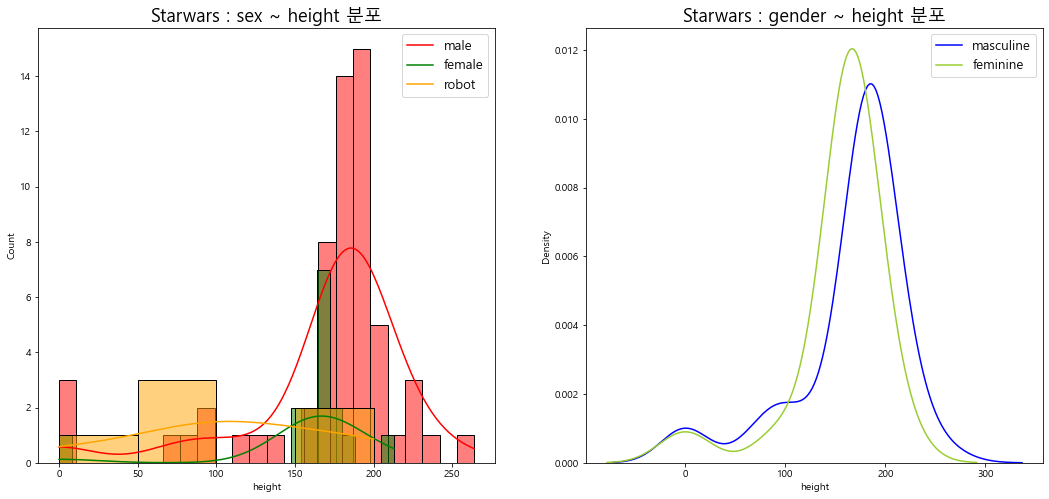

In [36]:
fig ,ax = plt.subplots(1, 2, figsize=(18,8))

_=sns.histplot(x=df_copy.loc[df_copy["sex"]=="male", "height"], ax=ax[0], color="red", kde=True)
_=sns.histplot(x=df_copy.loc[df_copy["sex"]=="female", "height"], ax=ax[0], color="green", kde=True)
_=sns.histplot(x=df_copy.loc[df_copy["sex"]=="robot", "height"], ax=ax[0], color="orange", kde=True)
_=ax[0].legend(["male", "female", "robot"])

_=sns.kdeplot(x=df_copy.loc[df_copy["gender"]=="masculine", "height"], ax=ax[1], color="blue")
_=sns.kdeplot(x=df_copy.loc[df_copy["gender"]=='feminine', "height"], ax=ax[1], color="yellowgreen")
_=ax[1].legend(["masculine", 'feminine'])

_=ax[0].set_title("Starwars : sex ~ height 분포", size=18)
_=ax[1].set_title("Starwars : gender ~ height 분포", size=18)

plt.show()
fig.savefig(".././images/starwars 성별~키 분포.png", dpi=200, facecolor='#FDFDFE') # 흰색 배경

# 남성 캐릭터가 여성 캐릭터보다 더 키가 큰 쪽으로 분포 되어있다.
# 로봇은 남성, 여성보다는 키가 더 작은 쪽에 분포되어 있다. (물론 키가 같은 경우도 존재한다.)

## 4-3. 가장 가벼운 캐릭터와 가장 무거운 캐릭터 & 종족 간 몸무게 비교?

In [37]:
# 몸무게 0이라고 지정한 것들은 빼고 확인하기.
notzMass=df_copy.loc[df_copy["mass"]!=0]
minMass=notzMass["mass"].min() # 최소 몸무게
maxMass=notzMass["mass"].max() # 최대 몸무게

In [38]:
minMassName=notzMass.loc[notzMass["mass"]==notzMass["mass"].min(), "name"].values[0]
minMassName

'Ratts Tyerell'

In [39]:
maxMassName=notzMass.loc[notzMass["mass"]==notzMass["mass"].max(), "name"].values[0]
maxMassName

'Jabba Desilijic Tiure'

In [40]:
# 최소 몸무게, 최소 몸무게를 가진 캐릭터 이름, 최대 몸무게, 최대 몸무게를 가진 캐릭터 이름
print(f"최소 몸무게 {minMass}를 가진 캐릭터 이름은 {minMassName}이다.")
print(f"최대 몸무게 {maxMass}를 가진 캐릭터 이름은 {maxMassName}이다.")

최소 몸무게 15.0를 가진 캐릭터 이름은 Ratts Tyerell이다.
최대 몸무게 1358.0를 가진 캐릭터 이름은 Jabba Desilijic Tiure이다.


In [41]:
weight=df_copy[["species", "mass"]].groupby(["species"]).mean()
weight

,mass
species,
Aleena,15.000000
Besalisk,102.000000
Cerean,82.000000
Chagrian,0.000000
Clawdite,55.000000
Droid,46.500000
Dug,40.000000
Ewok,20.000000
Geonosian,80.000000


In [42]:
weight["mass"].sort_values(ascending=False).head(10)

species
Hutt            1358.0
Kaleesh          159.0
Wookiee          124.0
Trandoshan       113.0
Besalisk         102.0
Neimodian         90.0
Nautolan          87.0
Mon Calamari      83.0
Cerean            82.0
Pau'an            80.0
Name: mass, dtype: float64

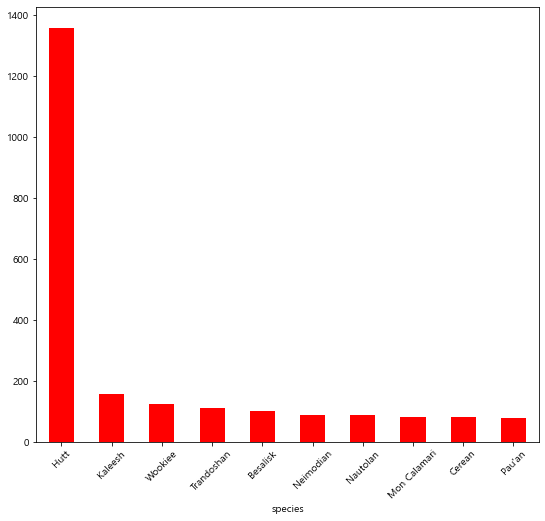

In [43]:
fig, ax=plt.subplots(1, 1, figsize=(9,8))
_=weight["mass"].sort_values(ascending=False).head(10).plot.bar(color="red", ax=ax)
_=plt.xticks(rotation=45)

_=plt.show()
fig.savefig(".././images/starwars weight 분포.png", dpi=200, facecolor='#FDFDFE') # 흰색 배경

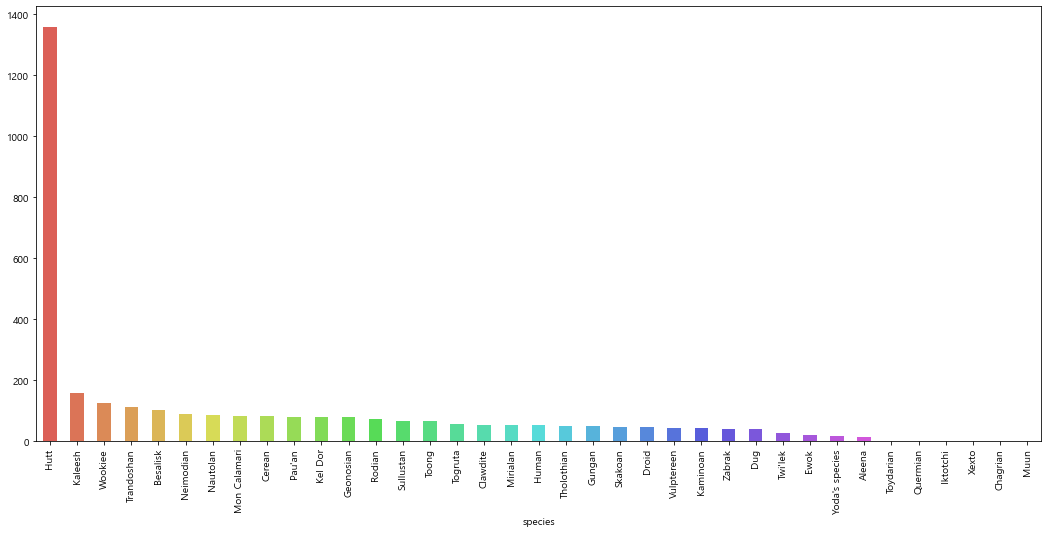

In [44]:
fig, ax=plt.subplots(1, 1, figsize=(18,8))
colors=sns.color_palette("hls", len(weight["mass"]))

_=weight["mass"].sort_values(ascending=False).plot.bar(color=colors, ax=ax)
# ax.set_xticklabels(np.arange(1, len(weight["mass"])+1)) : 만약에 x축 재조정하고 싶은 경우에는 ax를 이용하기.

_=plt.show()
fig.savefig(".././images/weight groupby.png", dpi=200, facecolor='#FDFDFE')

## 4-4. Starwars 캐릭터의 키와 몸무게는 상관관계를 가질까?

* 종족이 Hutt 같은 경우 outline data > 제외 시키기.
* 몸무게가 0인 경우 > 제외 시키기.

In [45]:
df_copy.dtypes

name           object
height        float64
mass          float64
hair_color     object
skin_color     object
eye_color      object
birth_year    float64
sex            object
gender         object
homeworld      object
species        object
dtype: object

In [46]:
massOut1=df_copy.loc[df_copy["species"]=="Hutt"]
massOut2=df_copy.loc[df_copy["mass"]==0]
print(massOut1)
print(massOut2)

                     name  height    mass hair_color        skin_color  \
15  Jabba Desilijic Tiure   175.0  1358.0        NaN  green-tan, brown   

   eye_color  birth_year             sex     gender  homeworld species  
15    orange       600.0  hermaphroditic  masculine  Nal Hutta    Hutt  
                   name  height  mass    hair_color   skin_color  eye_color  \
11       Wilhuff Tarkin   180.0   0.0  auburn, grey         fair       blue   
26           Mon Mothma   150.0   0.0        auburn         fair       blue   
27         Arvel Crynyd     0.0   0.0         brown         fair      brown   
32        Finis Valorum   170.0   0.0         blond         fair       blue   
35           Rugor Nass   206.0   0.0          none        green     orange   
36             Ric Oli?   183.0   0.0         brown         fair       blue   
37                Watto   137.0   0.0         black   blue, grey     yellow   
39        Quarsh Panaka   183.0   0.0         black         dark      bro

In [47]:
massOut1.index

Int64Index([15], dtype='int64')

In [48]:
df_copy.drop(massOut1.index, axis=0, inplace=True)

In [49]:
df_copy.drop(massOut2.index, axis=0, inplace=True)

In [50]:
df_copy

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,robot,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,robot,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human
5,Owen Lars,178.0,120.0,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human
6,Beru Whitesun lars,165.0,75.0,brown,light,blue,47.0,female,feminine,Tatooine,Human
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,robot,masculine,Tatooine,Droid
8,Biggs Darklighter,183.0,84.0,black,light,brown,24.0,male,masculine,Tatooine,Human
9,Obi-Wan Kenobi,182.0,77.0,"auburn, white",fair,blue-gray,57.0,male,masculine,Stewjon,Human


In [51]:
df_copy.shape

(58, 11)

In [52]:
df_copy["height"].sort_values(ascending=False) # height는 딱히 이상치가 존재하지 않는다.

77    234.0
68    229.0
12    228.0
34    224.0
76    216.0
80    206.0
3     202.0
21    200.0
48    198.0
67    198.0
33    196.0
49    196.0
30    193.0
73    193.0
63    193.0
31    191.0
22    190.0
10    188.0
78    188.0
47    188.0
54    188.0
56    185.0
51    184.0
65    183.0
59    183.0
8     183.0
20    183.0
9     182.0
17    180.0
13    180.0
25    180.0
79    178.0
43    178.0
75    178.0
5     178.0
23    177.0
24    175.0
41    175.0
14    173.0
0     172.0
19    170.0
60    170.0
16    170.0
66    168.0
1     167.0
61    166.0
86    165.0
6     165.0
46    163.0
29    160.0
4     150.0
38    112.0
7      97.0
2      96.0
44     94.0
28     88.0
71     79.0
18     66.0
Name: height, dtype: float64

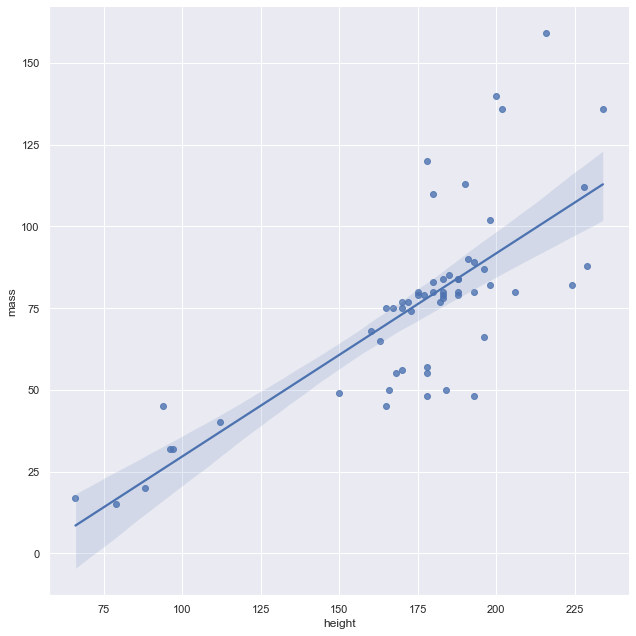

In [53]:
# height를 이용해서 크기를 조절할 수 있다.
_=sns.set(color_codes=True)
lm_plot=sns.lmplot(data=df_copy, x="height", y="mass", height=9) # 회귀선
lm_plot.savefig(".././images/height weight.png", dpi=200, facecolor='#FDFDFE') 
# (분포가 퍼져있긴 하지만) Starwars 캐릭터들은 키와 몸무게가 상관 관계로 이루어져 있다.

In [54]:
df_copy["gender"].value_counts()

masculine    48
feminine      9
Name: gender, dtype: int64

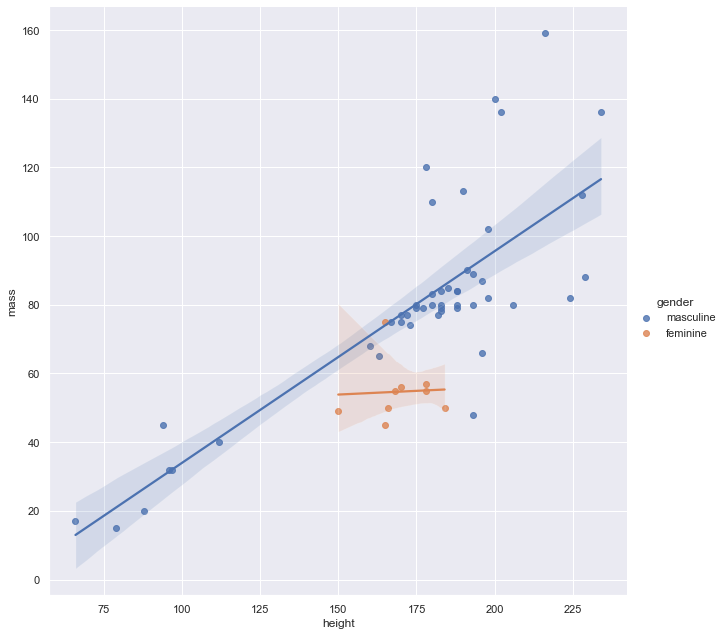

In [55]:
# height를 이용해서 크기를 조절할 수 있다.
_=sns.set(color_codes=True)
lm_plot=sns.lmplot(data=df_copy, x="height", y="mass", height=9, hue="gender") # 회귀선
lm_plot.savefig(".././images/height weight gender.png", dpi=200, facecolor='#FDFDFE') 
# (분포가 퍼져있긴 하지만) Starwars 캐릭터들은 키와 몸무게가 상관 관계로 이루어져 있다. + 여성 / 남성의 분포
# 여성의 상관 관계는 여성의 데이터가 부족하기 때문에 올바른 상관 관계라고 보기는 어렵다.

### 4-5. 스타워즈 캐릭터의 고향의 분포?

In [77]:
df_copy=df.copy() # 위에서 df_copy 조작했기 때문에, 다시 복사해서 불러왔다.
df_copy.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [78]:
df_copy["homeworld"].value_counts()

Naboo             11
Tatooine          10
Alderaan           3
Kamino             3
Coruscant          3
Mirial             2
Kashyyyk           2
Corellia           2
Ryloth             2
Iridonia           1
Iktotch            1
Quermia            1
Dorin              1
Champala           1
Geonosis           1
Zolan              1
Serenno            1
Concord Dawn       1
Cerea              1
Ojom               1
Aleen Minor        1
Skako              1
Muunilinst         1
Shili              1
Kalee              1
Umbara             1
Glee Anselm        1
Vulpter            1
Haruun Kal         1
Tund               1
Stewjon            1
Eriadu             1
Rodia              1
Nal Hutta          1
Bestine IV         1
Trandosha          1
Socorro            1
Bespin             1
Mon Cala           1
Chandrila          1
Endor              1
Sullust            1
Cato Neimoidia     1
Toydaria           1
Malastare          1
Dathomir           1
Troiken            1
Utapau       

In [79]:
df_copy.loc[df_copy["homeworld"].isnull()]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
18,Yoda,66.0,17.0,white,green,brown,896.0,male,masculine,NaN,Yoda's species
21,IG-88,200.0,140.0,none,metal,red,15.0,none,masculine,NaN,Droid
27,Arvel Crynyd,NaN,NaN,brown,fair,brown,NaN,male,masculine,NaN,Human
30,Qui-Gon Jinn,193.0,89.0,brown,fair,blue,92.0,male,masculine,NaN,Human
72,R4-P17,96.0,NaN,none,"silver, red","red, blue",NaN,none,feminine,NaN,Droid
81,Finn,NaN,NaN,black,dark,dark,NaN,male,masculine,NaN,Human
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,feminine,NaN,Human
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,masculine,NaN,Human
84,BB8,NaN,NaN,none,none,black,NaN,none,masculine,NaN,Droid
85,Captain Phasma,NaN,NaN,unknown,unknown,unknown,NaN,NaN,NaN,NaN,NaN


In [80]:
df_copy.loc[df_copy["homeworld"].isnull(), "homeworld"] = "UnKnown"

In [81]:
df_copy["homeworld"].unique()

array(['Tatooine', 'Naboo', 'Alderaan', 'Stewjon', 'Eriadu', 'Kashyyyk',
       'Corellia', 'Rodia', 'Nal Hutta', 'Bestine IV', 'UnKnown',
       'Kamino', 'Trandosha', 'Socorro', 'Bespin', 'Mon Cala',
       'Chandrila', 'Endor', 'Sullust', 'Cato Neimoidia', 'Coruscant',
       'Toydaria', 'Malastare', 'Dathomir', 'Ryloth', 'Vulpter',
       'Troiken', 'Tund', 'Haruun Kal', 'Cerea', 'Glee Anselm',
       'Iridonia', 'Iktotch', 'Quermia', 'Dorin', 'Champala', 'Geonosis',
       'Mirial', 'Serenno', 'Concord Dawn', 'Zolan', 'Ojom',
       'Aleen Minor', 'Skako', 'Muunilinst', 'Shili', 'Kalee', 'Umbara',
       'Utapau'], dtype=object)

In [96]:
df_copy["homeworld"].value_counts()

Naboo             11
Tatooine          10
UnKnown           10
Alderaan           3
Coruscant          3
Kamino             3
Mirial             2
Ryloth             2
Corellia           2
Kashyyyk           2
Nal Hutta          1
Concord Dawn       1
Iktotch            1
Quermia            1
Dorin              1
Champala           1
Geonosis           1
Stewjon            1
Serenno            1
Zolan              1
Glee Anselm        1
Ojom               1
Aleen Minor        1
Skako              1
Muunilinst         1
Shili              1
Kalee              1
Umbara             1
Iridonia           1
Haruun Kal         1
Cerea              1
Sullust            1
Rodia              1
Trandosha          1
Socorro            1
Bespin             1
Mon Cala           1
Chandrila          1
Endor              1
Cato Neimoidia     1
Bestine IV         1
Toydaria           1
Malastare          1
Dathomir           1
Eriadu             1
Vulpter            1
Troiken            1
Tund         

In [150]:
df_copy["gender"].unique()

array(['masculine', 'feminine', nan], dtype=object)

In [154]:
df_genFe=df_copy.loc[df_copy["gender"]=="feminine"]
df_genMa=df_copy.loc[df_copy["gender"]=="masculine"]

In [155]:
df_genFe

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human
6,Beru Whitesun lars,165.0,75.0,brown,light,blue,47.0,female,feminine,Tatooine,Human
26,Mon Mothma,150.0,NaN,auburn,fair,blue,48.0,female,feminine,Chandrila,Human
40,Shmi Skywalker,163.0,NaN,black,fair,brown,72.0,female,feminine,Tatooine,Human
43,Ayla Secura,178.0,55.0,none,blue,hazel,48.0,female,feminine,Ryloth,Twi'lek
51,Adi Gallia,184.0,50.0,none,dark,blue,NaN,female,feminine,Coruscant,Tholothian
57,Cord?,157.0,NaN,brown,light,brown,NaN,female,feminine,Naboo,Human
60,Luminara Unduli,170.0,56.2,black,yellow,blue,58.0,female,feminine,Mirial,Mirialan
61,Barriss Offee,166.0,50.0,black,yellow,blue,40.0,female,feminine,Mirial,Mirialan
62,Dorm?,165.0,NaN,brown,light,brown,NaN,female,feminine,Naboo,Human


In [156]:
df_genMa

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
5,Owen Lars,178.0,120.0,"brown, grey",light,blue,52.0,male,masculine,Tatooine,Human
...,...,...,...,...,...,...,...,...,...,...,...
78,Raymus Antilles,188.0,79.0,brown,light,brown,NaN,male,masculine,Alderaan,Human
80,Tion Medon,206.0,80.0,none,grey,black,NaN,male,masculine,Utapau,Pau'an
81,Finn,NaN,NaN,black,dark,dark,NaN,male,masculine,UnKnown,Human
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,masculine,UnKnown,Human


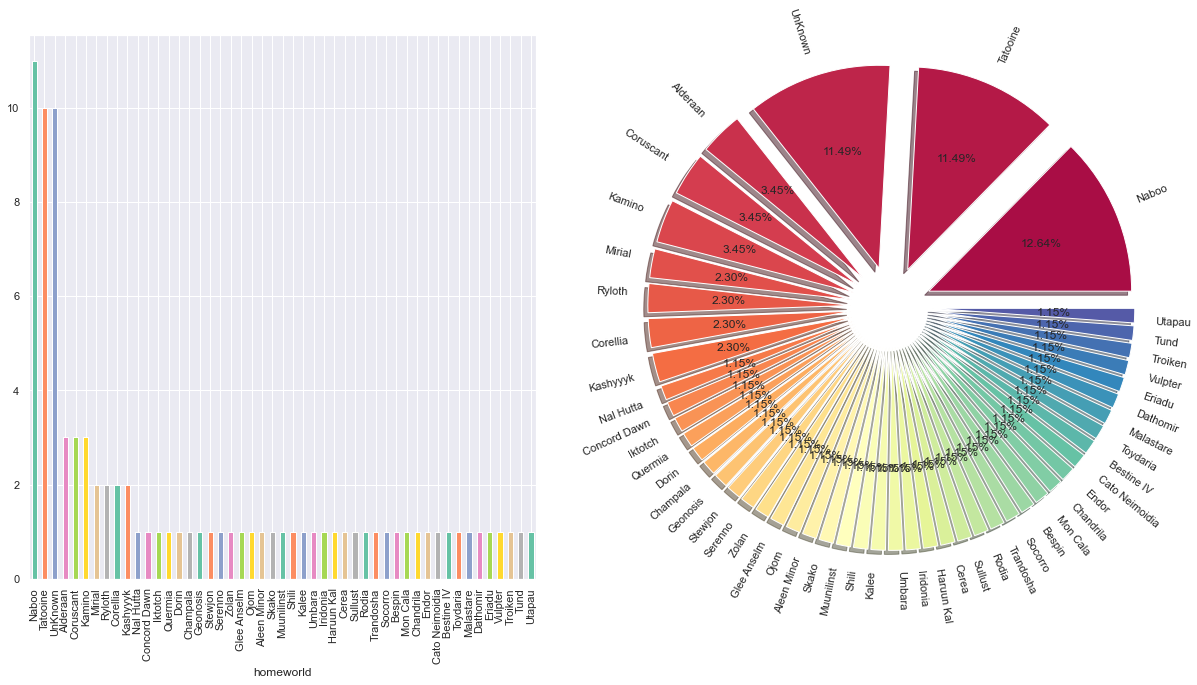

In [196]:
fig, ax=plt.subplots(1, 2, figsize=(20, 10))
colors=sns.color_palette("Set2", df_copy["homeworld"].nunique()) # 색상 목록 또는 팔레트를 정의하는 연속적인 색상표를 반환한다.
explodes=[0.2]*df_copy["homeworld"].nunique()
color_list=sns.color_palette("Spectral", df_copy["homeworld"].nunique())

_=df_copy["homeworld"].value_counts().plot.bar(ax=ax[0], color=colors)
_=ax[0].set_xlabel("homeworld")

_=df_copy["homeworld"].value_counts().plot.pie(ax=ax[1], autopct="%.2f%%", explode=explodes, shadow=True, 
                                               colors=color_list, rotatelabels=45)
_=ax[1].set_ylabel("")

fig.savefig(".././images/homeworld.png", dpi=200, facecolor='#FDFDFE') 
# Naboo 출신이 가장 많았고, 생각보다 고향을 알 수 없는 캐릭터들이 거의 11% 정도 차지하고 있었다. 그리고 각자 고향이 다른 경우도 굉장히 많았다.

### 4-7. 스타워즈 캐릭터의 종과 눈 색깔의 분포?

In [199]:
df_copy.columns

Index(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color',
       'birth_year', 'sex', 'gender', 'homeworld', 'species'],
      dtype='object')

In [200]:
df_copy["species"].unique()

array(['Human', 'Droid', 'Wookiee', 'Rodian', 'Hutt', "Yoda's species",
       'Trandoshan', 'Mon Calamari', 'Ewok', 'Sullustan', 'Neimodian',
       'Gungan', nan, 'Toydarian', 'Dug', 'Zabrak', "Twi'lek",
       'Vulptereen', 'Xexto', 'Toong', 'Cerean', 'Nautolan', 'Tholothian',
       'Iktotchi', 'Quermian', 'Kel Dor', 'Chagrian', 'Geonosian',
       'Mirialan', 'Clawdite', 'Besalisk', 'Kaminoan', 'Aleena',
       'Skakoan', 'Muun', 'Togruta', 'Kaleesh', "Pau'an"], dtype=object)

In [201]:
df_copy["eye_color"].unique()

array(['blue', 'yellow', 'red', 'brown', 'blue-gray', 'black', 'orange',
       'hazel', 'pink', 'unknown', 'red, blue', 'gold', 'green, yellow',
       'white', 'dark'], dtype=object)

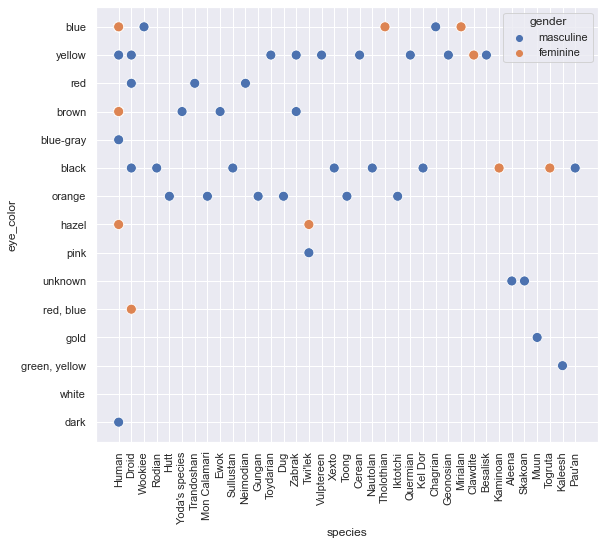

In [260]:
_=sns.set(rc = {'figure.figsize':(9,8)})
_=sns.scatterplot(data=df_copy, x="species", y="eye_color", s=100, hue="gender")
_=plt.xticks(rotation=90)

plt.savefig(".././images/gender eyecolor.png", dpi=200, facecolor='#FDFDFE') # plt 이용하기.
# 눈 색깔과 종의 분포를 알 수 있다. 종에 따라 눈 색이 다른 편이고, 같은 종이라도 눈 색이 다른 경우가 많이 보인다. 따라서 종과 눈 색깔과의 관련성은 없어 보인다.

### 4-8. gender에 따른 종의 분포?

In [220]:
df_copy["gender"].unique()

array(['masculine', 'feminine', nan], dtype=object)

In [222]:
FeSpec=df_copy.loc[df_copy["gender"]=="feminine", "species"]
MaSpec=df_copy.loc[df_copy["gender"]=="masculine", "species"]

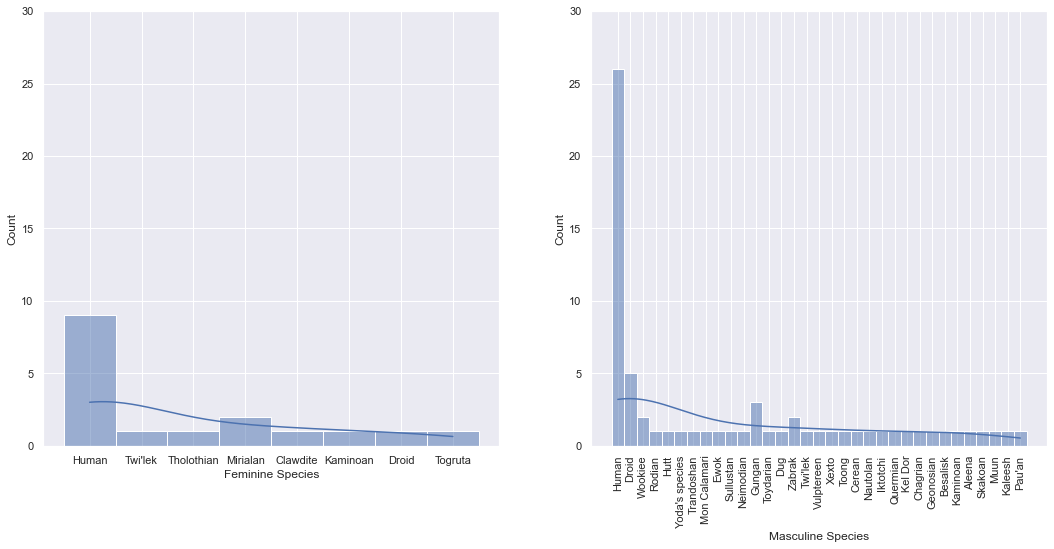

In [259]:
fig, ax=plt.subplots(1, 2, figsize=(18,8))

_=sns.histplot(x=FeSpec, ax=ax[0], kde=True)
_=ax[0].set_xlabel("Feminine Species")

_=sns.histplot(x=MaSpec, ax=ax[1], kde=True)
_=ax[1].set_xlabel("Masculine Species")
_=plt.xticks(rotation=90)

_=ax[0].set_ylim(0, 30)
_=ax[1].set_ylim(0,30)

fig.savefig(".././images/species gender.png", dpi=200, facecolor='#FDFDFE') 
# feminine의 데이터 수가 적어서 상대적으로 수치가 낮게 나왔다. 하지만 feminine, masculine 모두 Human이 많다.

# 5. 리뷰

* 총 데이터의 개수 :  957
* 총 결측치의 개수 : 105 = 전체 데이터의 10.97%
* 스타워즈에 나오는 주인공의 수 :  87
* 스타워즈에 나오는 종의 수 :  37

* masculine은 전체 gender의 79.52%이다.
* feminine은 전체 gender의 20.48%이다.

* 남자 캐릭터가 키가 큰 편에 속하고, 로봇은 남자와 여자보다 키가 작은 편에 속한다.

* 최소 몸무게 15.0를 가진 캐릭터 이름은 Ratts Tyerell이다.
* 최대 몸무게 1358.0를 가진 캐릭터 이름은 Jabba Desilijic Tiure이다.

* Starwars 캐릭터의 키와 몸무게는 대체로 비례 관계를 보인다. 즉, 상관 관계를 가진다.
: 남자 캐릭터는 데이터가 많아서 상관 관계를 보일 수 있지만, 여자 캐릭터는 비교적 데이터의 수가 작아서 올바른 상관 관계라고 보기 어렵다. 몸무게에 0이 아닌, 다른 데이터가 충족 된다면 제대로 알 수 있을 것 같다.

* Naboo 출신이 가장 많았고, 생각보다 고향을 알 수 없는 캐릭터들이 거의 11% 정도 차지하고 있었다. 그리고 각자 고향이 다른 경우도 굉장히 많았다.
* 종에 따라 눈 색이 다른 편이고, 같은 종이라도 눈 색이 다른 경우가 많이 보인다. 따라서 종과 눈 색깔과의 관련성은 없어 보인다.
* feminine의 데이터 수가 적어서 상대적으로 수치가 낮게 나왔다. 하지만 feminine, masculine 모두 Human이 많다.